## Slow example

This is an example of my code that runs slow.  I am going to calculate the (Mie) X-ray scattering cross-section for a power-law distribution of dust grain sizes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import dust
import sigma_scat as ss

Set up the grain size distribution.  Let's assume all the dust grains are silicate.

In [4]:
AMIN, AMAX = 0.005, 0.25 # microns
NA  = 50  # number of points to use to sample distribution
RHO = 3.8 # grain density (g cm^-3)
P   = 3.5 # power law slope

mrn = dust.Dustdist( rad=np.linspace(AMIN,AMAX,NA), rho=RHO, p=P )

Calculate the scattering and extinction opacity

In [9]:
ENERGY = np.logspace(-1,1,50)
MDUST  = 1.e22 * dust.c.mp() * 0.009  # magic numbers (dust mass per 10^22 H)

In [10]:
kscat = ss.Kappascat( E=ENERGY, dist=dust.Dustspectrum(rad=mrn), 
                      scatm=ss.makeScatmodel('Mie','Silicate') )

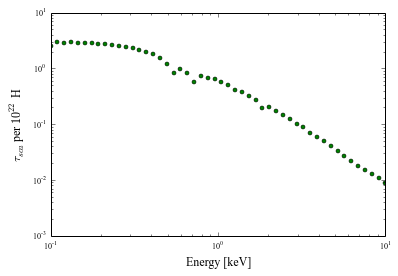

In [12]:
plt.plot( ENERGY, kscat.kappa*MDUST, 'go' )
plt.loglog()
plt.xlabel('Energy [keV]')
plt.ylabel(r'$\tau_{sca}$ per $10^{22}$ H')

How about the extinction cross-section for a single grain size?

In [18]:
RGRAIN = 0.25 # micron
kext = ss.Kappaext( E=ENERGY, dist=dust.Dustspectrum(rad=dust.Grain(RGRAIN, rho=RHO)), 
                    scatm=ss.makeScatmodel('Mie','Silicate') )

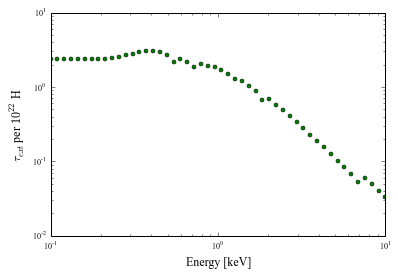

In [22]:
plt.plot(ENERGY, kext.kappa*MDUST, 'go')
plt.loglog()

plt.xlabel('Energy [keV]')
plt.ylabel(r'$\tau_{ext}$ per $10^{22}$ H')